# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

### Who 

The buyers in the retail company "XYZ  Retail Co", the marketing team and the management of the company who needs to strategize on promotions and merchandising

### What 

what are the more important time of the year that people spend money so they can focus on deals and offers on those days along with good merchandise. How much impact does holidays have on sales and which departments are the high sales departments. 



### How

We will analyze Walmart store sales data for the period 02/05/2010 to 10/26/2012  from 45 stores and 81 departments (of the 45 stores) which are available in public domain(kaggle). We will analyze overall sales pattern for multiple years of data available and see if there is correlation of sales to holidays. We will also look into economic indicators , gas prices and temperature to understand the sales patterns. We could arrive at a ML model which we can then use to forecast sales and plan for merchandise and promotions( including markdown). 



### Executive Summary of findings
Base don our analysis of the Walmart datsset  we see very high degree of correlation between holidays and sales. We observed that the sales are highest during the Thanksgiving week and just before Christmas. During other major holidays(Easter and July 4th) there is a bump in sales(15%). There other factors including mark down and economic indicators that could also impact sales. Inorder to capitalize on this spending pattern the company should target these weeks aggressively with good deals and offers.

The ipython notebook is also available in this url : 

# 3. Homework - work with your own data

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

@misc{walmart-sales-forecasting,
    author = {Jannes Klaas},
    title = {Walmart Sales Forecasting},
    year = {2018},
    howpublished = {\url{https://kaggle.com/competitions/walmart-sales-forecasting}},
    note = {Kaggle}
}

###  Walmart Dataset 
This analysis uses the walmart-sales-forecasting dataset ( https://kaggle.com/competitions/walmart-sales-forecasting), published by author Jannes Klaas in the year 2018. The dataset contains sales data from walmart store sales for 45 stores and 81 departments for the period 02/05/2010 to 10/26/2012

### Dataset Description 
#### The Data 


The Dataset provides historical sales data for 45 Walmart stores located in different regions. Each store contains a number of department.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.


#### train.csv 


282451 sales records for training 


#### test.csv


139119 records missing Weekly_Sales



#### Data fields


* Store - the store number (categorical data)


* Dept - the department number (categorical data)


* Date - the date of the week when data was collected


* Weekly_Sales - sales for the given department in the given store


* Temperature - average temperature in the region


* Fuel_Price - cost of fuel in the region


* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.


* CPI - the consumer price index


* Unemployment - the unemployment rate


* IsHoliday - whether the week is a special holiday week


* Type: An anonymized description on which type of store it is (categorical)



The Zip files with all the data are downloaded and analyzed. There are three files in the dataset which can be analyzed :

a) train.csv - Weekly sales data used for training and testing later

b) stores.csv - Stores datta containing stre information ie store number, type and size

c) features.csv - Features data containing store, date, markdown, fuel price, temperature and CPI and unemployment rate etc.

In [53]:
#open each of the files with appropriate naming of the dataset 

sales_df = pd.read_csv('train.csv')  #Weekly sales data used for training and testing later
stores_df = pd.read_csv('stores.csv') # Stores data
features_df = pd.read_csv('features.csv')

## Each of the three dataframes needs to be looked into to check what are the columns and what kinds of data are there before we strategize on the analysis and what we need to do with the data.

### Analyze Sales data(sales_df)

####     Observations (summarized in this section but analyzed in detail below):

Rows of data = 421570 
Date column is in object dtype(most likely string)  needs to be converted to datetime dtype , IsHoliday is in bool type which will need to be one hot coded later on

Weekly sales has -ve value as minimum , we need to look into it to see if for a particular dept the value was -ve which is possible but if we see that for a store its -ve then there could be something wrong with the data but any depart for a particular store could have -ve value due to net saes being -ve as return value was higher than sales value. For the overall store though sales will be positive. The mean weekly sales is $ \$149.72 million$.
 The median weekly sales  is  $ \$138.25 miillion$

The analysis show the data is clean for the store sales and -ve values are valid values and those are specific to departments and not the store. 

The date Range of the dataset aligns with the date range stated by the data provider i.e between 02/054/2010 and 10/26/2013

The Store column has 45 unique categorical values(nominal) , Dept has 81 unique categorical(nominal) values.

#### the above point(number of categorical values in the two columns is important from the consideration of when to do one hot encoding so as not to increase the columns due to the effect of onehot encoding

We found no duplicate rows or rows with NA or null values. The data is clean.


In [54]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [55]:
sales_df.describe([1/3,2/3])

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
33.3%,15.000000,24.000000,3521.780000
50%,22.000000,37.000000,7612.030000
66.7%,29.000000,56.000000,14599.760000
max,45.000000,99.000000,693099.360000


There are rows with -ve sales  which shows that there are departments for stored ID whose weekly sales was -ve. This is possible lets then check if the overall sales for that store was -ve or not  , if not then we can consider to keep these values
 

In [56]:
sales_df[sales_df["Weekly_Sales"]<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


Lets check if there are stores with -ve sales which needs to be dropped. If there are no weekly sales in -ve teretory then the values can be kept as is

In [57]:
total_weekly_sales_bystore = sales_df.groupby('Store')['Weekly_Sales'].sum()

In [58]:
total_weekly_sales_bystore.sort_values(ascending=True)

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

#### One observation from the above based on the weekly sales data is that the Store(ID) does not have any ordinal relationship ie there is no order i.e. higher store id has higher sales etc. so the data for this field is nominal but in int so we will need to do one hot encoding when we analysis for comparing stores performance

In [59]:
total_weekly_sales_bystore.describe([1/3,2/3])

count    4.500000e+01
mean     1.497160e+08
std      7.816756e+07
min      3.716022e+07
33.3%    9.756260e+07
50%      1.382498e+08
66.7%    1.908300e+08
max      3.013978e+08
Name: Weekly_Sales, dtype: float64

No such stores were found whose overall sales are -ve. So we can keep the -ve values as is and not drop them.

Let us check if there are more than 45 store id if so then there could be spurious data . We see store id's are ranging 1 through 45 so there are no spurious data 

Lets see the median store sales 

In [60]:
total_weekly_sales_bystore.median()

np.float64(138249763.0)

In the below line we see that store ids are having order but these have no relationship to the order of the sales volume but there are 45 storeIDs which are unique between 1 and 45

In [61]:
sales_df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

There are 81 unique departments across all 45 stores as observed below


In [62]:
sales_df["Dept"].unique().shape

(81,)

Below line shows there are 0 duplicate rows in the Sales DF

In [63]:
#check for any duplicate rows
sales_df.duplicated().sum()

np.int64(0)

Lets check for null or NA values (non found in the sales DF as shown below)

In [64]:
sales_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [65]:
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

So There are no duplicate rows, there are no NA or null values. 

Let us check if the date range is valid and there are any value in the Dtype object which doesnt fall in the dataset provided date range

Lets Convert date column Object Dtype to datetime Dtype . As shown below the date range is between the given date range for the dataset so no cleaning up needed

#### search on google : "dataframe largest values in columns"
 
One item sshowed up : pandas.DataFrame.nlargest — pandas 2.2.3 documentation (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)

DataFrame.nlargest(n, columns, keep='first')[source]
Return the first n rows ordered by columns in descending order.

Return the first n rows with the largest values in columns, in descending order. 

Looked into Matplotlib  for :Pyplot annotate

Received result: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate 

matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
minimum needed are first two  arguments

In [66]:
try:
	sales_df["Date"] = pd.to_datetime(sales_df["Date"], format='%Y-%m-%d')
	print("It worked!")
except ValueError as e:
	print(f"ValueError for AccountOpened: {e}")
sales_df["Date"].describe()

It worked!


count                           421570
mean     2011-06-18 08:30:31.963375104
min                2010-02-05 00:00:00
25%                2010-10-08 00:00:00
50%                2011-06-17 00:00:00
75%                2012-02-24 00:00:00
max                2012-10-26 00:00:00
Name: Date, dtype: object

The data in the sales_df is clean and can be used.

Based on the above and the dataset description given what observe is that Store, Dept are categorical data, and we may need to do one hot coding later on if needed . Bool Dtype doesnt need onehot coding i.e. is_holiday column. The Store column has 45 unique data(nominal) , Dept has 81 unique and nominal values
 

### Analysis of Stores data(stores_df)

####     Observations (summarized in this section but analyzed in detail below):
Rows of data = 45  (matches with the data provided in the sales_df 
Store and Type are categorical (non ordinal)data and will need one hot coding. Overall data looks clean and without duplicates or null(or NA) and values are within acceptable range . The size of stores are all positive and looks within acceptable range. Due to large number of values of the categorical columns(stio we will keep the store and Type as categorical value and before the stage we need to convert them to int datatype we will perform one hot encoding. This will help us keep the columns within manageable numbers

#### Now lets do a quick analysis of the stores_df dataframe

In [67]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### now lets understand the data in the stores_df dataframe

Strore IDs min is 1 max is 45 and count is 45 which means each of the row looks to be for individual store but we will validate. The store size column shows that min area is 63825 (guessing sq feet) and max is 219622


In [68]:
stores_df.describe([1/3,2/3])

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
33.3%,15.666667,109385.666667
50%,23.000000,126512.000000
66.7%,30.333333,166779.000000
max,45.000000,219622.000000


In [69]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [70]:
stores_df.duplicated().sum()

np.int64(0)

In [71]:
stores_df.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [72]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

There are no duplicates  or null or na values .

Based on the above DTypes The column of name "Type" is of type object but looks like string and from the definition it looks like a mapped value of store type. . We will try to see how many different store type are there. If its limited numbers in low two digit we can use one hot encoding now else we will put it for later i.e during doing specific analysis
   

In [73]:
stores_df['Type'].value_counts()


Type
A    22
B    17
C     6
Name: count, dtype: int64

#### we see there are three types A, B , C  and sum total of the frequency of the three types is 45 which is max numbe rof stores in the dataset

In [74]:
stores_df['Store'].unique().shape

(45,)

So the data looks clean without duplicates or null(or NA) and values are within acceptable range . The size of stores are all positive and looks within acceptable range

Lets do one hot coding of the Type column
one_hot = pd.get_dummies(df_bank_datefix["AccountType"], prefix='AccountType')
one_hot_encoded = one_hot.astype(int)
df_bank_datefix = df_bank_datefix.join(one_hot_encoded)
df_bank_datefix = df_bank_datefix.drop(columns=['cd', 'checking', 'savings'], errors='ignore')  #

df_bank_datefix


In [75]:
one_hot = pd.get_dummies(stores_df["Type"], columns=['Type'], prefix='Store_Type')
stores_df = stores_df.join(one_hot)

stores_df = stores_df.drop(columns=['Type'], errors='ignore') 

In [76]:
stores_df

,Store,Size,Store_Type_A,Store_Type_B,Store_Type_C
0,1,151315,True,False,False
1,2,202307,True,False,False
2,3,37392,False,True,False
3,4,205863,True,False,False
4,5,34875,False,True,False
5,6,202505,True,False,False
6,7,70713,False,True,False
7,8,155078,True,False,False
8,9,125833,False,True,False
9,10,126512,False,True,False




### Analysis features data(features_df)
It looks like this dataframe is giving us allied datapoints for each store by date and has markdown ,fuel price ,temperature and also giving us economic indicators i.e. CPI and unemployment rate


####     Observations (summarized in this section but analyzed in detail below):
Rows of data = 8190  

The Markdown data has values only in 2921 to max 4032 rows so majority are missing or not available 

Both the CPI data and unemployment data has values only in 7605 rows. 

Store are categorical data and before any training is done we need to convert those to integer by doing one hot encoding 

The Date column Dtype is object and needs to be changed to dateTime type. 

After converting we observe that the Date column value range is beyond the date range of the sales DF. We dont want to drop this data from the features DF as we may need the range beyond the sales data provided range for the testing or forecasting sales . Inorder not to consider this excess data we will try to use appropriate join clause to discard it in the merged data but leave it in the features dataframe. Base don earlier sales_df the date range of sales data is between 02/05/2010 and 10/26/2012. The features have date extending to 07/26/2013 (i.e nearly 9 months more)

Since there are missing data in the features file(like markdown and CPI and employment) we will not drop the 'na' or null or missing data rows now, else it will drop many rows. instead we will keep the data and before doing specific analysis or training we will either dropna or impute as needed. The BLS site has CPI and employment data and for the date range we see the data as missing we can impute values  from the BLS site.

The gas prices, temperature looks normal 

#### The unemployment data max looks incorrect and much higher(dataframe max is 14.3%) as US unemployment in those years was max at 8.1%, so we will look more into that column  

https://www.statista.com/statistics/193290/unemployment-rate-in-the-usa-since-1990/

On further research of data from BLS site we see during 2010  there were states which had unemployment in the range of 14% so we decided to keep the data as is and not drop it.

We see no duplicate rows but the CPI data doesnt look to be at par with BLS data so we may need to drop the incorrect values or impute it ?(for the initial round I will drop the data if the CPI is with the limits of the BLS provided data) available at  https://www.ssa.gov/oact/STATS/avgcpi.html 

In [77]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Lets convert the Date Dtype and see the range of the dates for which features have been provided

We see the date range is beyond the date range of the sales DF. We dont want to drop this data from the features DF as we may need the range beyond the sales data provided range for the testing or forecasting sales . Inorder to not to consider this excess data we will try to use appropriate join clause to discard it in the merged data but leave it in the features dataframeWhen  

In [78]:
try:
	features_df["Date"] = pd.to_datetime(features_df["Date"], format='%Y-%m-%d')
	print("It worked!")
except ValueError as e:
	print(f"ValueError for AccountOpened: {e}")
features_df["Date"].describe()

It worked!


count                   8190
mean     2011-10-31 12:00:00
min      2010-02-05 00:00:00
25%      2010-12-17 00:00:00
50%      2011-10-31 12:00:00
75%      2012-09-14 00:00:00
max      2013-07-26 00:00:00
Name: Date, dtype: object

In [79]:
features_df.describe([1/3 , 2/3])

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,2011-10-31 12:00:00,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
min,1.000000,2010-02-05 00:00:00,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
33.3%,15.666667,2011-04-01 00:00:00,51.000000,3.227000,2619.403333,122.560000,11.720000,518.816667,1818.680000,136.054032,7.082000
50%,23.000000,2011-10-31 12:00:00,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
66.7%,30.333333,2012-06-01 00:00:00,69.543333,3.651333,7211.456667,1100.470000,96.900000,2369.033333,3904.010000,210.077189,8.300000
max,45.000000,2013-07-26 00:00:00,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259


In [80]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [81]:
features_df.duplicated().sum()

np.int64(0)

In [82]:
features_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [83]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#### Here is the quick analysis of the CPI column and markdown columns of the features dataframe (feature file)

When I look into this  site https://www.ssa.gov/oact/STATS/avgcpi.html i see the real CPI range for this whole period was between 212 to 232 which is contrary to what we are seeing in data. The max is looking good but min is 126 and mean is 172 which may be due to incorrect data but the same needs to be looked into when doing CPI and inflation related analysis.

From the features dataframe we see that Markdown data is very limited and there are lots of missing data Out of the total 8190 rows we see between 4000 an 5300 missing data which is not good. So may have to drop that for initial analysis and only if specific analysis is needed later on we will revisit it.

There are no duplicates but there are null values which will need cleanup 

#### Lets cleanup the features data(features_df) which was in features.csv file

Lets impute the CPI figure by year is if for the year 2010 the CPI is below a threshold we will replace it by BLS average of the CPI for that year . The threshold used  is whatever the CPI minimum CPI value in the 3 months preceding replace with the annual CPI average:

The threshold value we will use at which we will start imputing is 211 as the value for CPI six months before the first value is higher than 211. TIll 213 it was never more than 229 

2010: average CPI - impute with 213.967  , if below 214 for 2011 with 221.575 , if below 222 with 226.229  and for 213 impute with 229.324


In [84]:
features_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [85]:

# impute function  to replace CPI values the return value is 1 less of the average CPI for the year as the CPI is increasing trend 
def impute_cpi_value(feature_row):
    if feature_row['Date'].year == 2010 and feature_row['CPI'] <= 211:
        return (213.967 - 1)
    elif feature_row['Date'].year == 2011 and feature_row['CPI'] <= 214:
        return (221.575 - 1)
    elif feature_row['Date'].year == 2012 and feature_row['CPI'] <= 222:
        return (226.229-1)
    elif feature_row['Date'].year == 2013 and feature_row['CPI'] <= 226:
        return (229.324- 1)
    else:
        return feature_row['CPI']

# impute the  value of CPI  in the features dataframe for the values which look out of range compared to BLS data
features_df['CPI'] = features_df.apply(impute_cpi_value, axis=1)



In [86]:
features_df.describe()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,2011-10-31 12:00:00,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,220.301638,7.826821
min,1.000000,2010-02-05 00:00:00,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,211.006754,3.684000
25%,12.000000,2010-12-17 00:00:00,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,212.967000,6.634000
50%,23.000000,2011-10-31 12:00:00,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,220.575000,7.806000
75%,34.000000,2012-09-14 00:00:00,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,225.229000,8.567000
max,45.000000,2013-07-26 00:00:00,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,5.493888,1.877259


In [87]:
features_df["Date"].describe([1/3,2/3])

count                   8190
mean     2011-10-31 12:00:00
min      2010-02-05 00:00:00
33.3%    2011-04-01 00:00:00
50%      2011-10-31 12:00:00
66.7%    2012-06-01 00:00:00
max      2013-07-26 00:00:00
Name: Date, dtype: object

We see the features_df has dates which are beyond the last date of sales data so we will take care of it while joining so we can work with intersection of the dates
Once we join then we will look into cleaning up null data which we will find in Markdowns, CPI and Unemployment rate data. I dont want to clean it now as that will create a smaller intersection of sales data and hurt my analysis, so will do it after joining the dataframes and will create  multiple dataframes ie one for sales analysis ,  one for markdown analysis and one for analysis of sales dependency CPI and unemployment  

### As mentioned earlier the sales_df and store_df data looks clean and we dont need to do any cleaning only feature dataframe is what we will need to when needed 

### let us merge the Sales_df to the Store_df based on Store column name

In [88]:
sales_stores_df = pd.merge(
    sales_df, 
    stores_df, 
    how='left',
    on='Store'
)


In [89]:
sales_stores_df.describe()

,Store,Dept,Date,Weekly_Sales,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,60980.583328


In [90]:
sales_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Size          421570 non-null  int64         
 6   Store_Type_A  421570 non-null  bool          
 7   Store_Type_B  421570 non-null  bool          
 8   Store_Type_C  421570 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(1), int64(3)
memory usage: 17.7 MB


#### Now we will merge the features dataframe with the above dataframe to get the final dataframe. We are doing left join as we want to keep all the sales data and not lose any data but discard the features data which spans beyond the last available sales data  

In [91]:
final_df = pd.merge(
    sales_stores_df,
    features_df,
    how='left',
    on=['Store', 'Date']
)

In [92]:
final_df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,219.089564,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,211.006754,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,212.967000,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,220.575000,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,225.229000,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,5.001438,1.863296


In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Size          421570 non-null  int64         
 6   Store_Type_A  421570 non-null  bool          
 7   Store_Type_B  421570 non-null  bool          
 8   Store_Type_C  421570 non-null  bool          
 9   Temperature   421570 non-null  float64       
 10  Fuel_Price    421570 non-null  float64       
 11  MarkDown1     150681 non-null  float64       
 12  MarkDown2     111248 non-null  float64       
 13  MarkDown3     137091 non-null  float64       
 14  MarkDown4     134967 non-null  float64       
 15  MarkDown5     151

### Create one additional dataset from the final dataset so as we can use reduced set of rows by dropping na/null for doing specific analysis so as to avoid effect of dropping na values causing issues

New Dataset 1 (store_sales_with_markdown ): for doing mark down analysis

In [94]:
sales_with_markdown_df = final_df.copy()
sales_with_markdown_df.dropna(subset=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [95]:
sales_with_markdown_df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,97056.000000,97056.000000,97056,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000
mean,20.239408,44.278746,2012-04-16 11:54:48.427299840,17857.195155,155229.302980,57.348331,3.618946,8841.260245,3693.532392,1816.629491,4025.923108,5310.830581,224.168040,7.414578
min,1.000000,1.000000,2011-11-11 00:00:00,-1699.000000,34875.000000,7.460000,3.031000,32.500000,-265.760000,-29.100000,0.460000,170.640000,216.721737,4.077000
25%,10.000000,19.000000,2012-01-20 00:00:00,2763.892500,119557.000000,42.750000,3.413000,3600.790000,47.550000,5.400000,605.880000,2383.670000,223.965862,6.392000
50%,20.000000,37.000000,2012-03-30 00:00:00,8622.160000,155083.000000,57.950000,3.630000,6264.180000,192.000000,30.460000,1739.830000,3864.600000,225.229000,7.280000
75%,29.000000,72.000000,2012-07-20 00:00:00,22740.542500,203742.000000,72.660000,3.820000,10333.240000,2551.320000,123.420000,4082.990000,6197.530000,225.229000,8.256000
max,45.000000,99.000000,2012-10-26 00:00:00,630999.190000,219622.000000,95.910000,4.301000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.036936,12.890000
std,12.037946,30.119460,NaN,24732.104674,51201.162733,18.263734,0.280003,9258.091154,10058.901796,10989.284083,7173.060535,6535.397883,1.998846,1.708319


In [96]:
sales_with_markdown_df = sales_with_markdown_df[sales_with_markdown_df['MarkDown1'] >= 0]
sales_with_markdown_df = sales_with_markdown_df[sales_with_markdown_df['MarkDown2'] >= 0]
sales_with_markdown_df = sales_with_markdown_df[sales_with_markdown_df['MarkDown3'] >= 0]
sales_with_markdown_df = sales_with_markdown_df[sales_with_markdown_df['MarkDown4'] >= 0]
sales_with_markdown_df = sales_with_markdown_df[sales_with_markdown_df['MarkDown5'] >= 0]

In [97]:
sales_with_markdown_df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,95741.000000,95741.000000,95741,95741.000000,95741.000000,95741.000000,95741.000000,95741.000000,95741.000000,95741.000000,95741.000000,95741.000000,95741.000000,95741.000000
mean,20.242999,44.283713,2012-04-15 10:56:23.152463360,17856.232998,155154.523600,57.159185,3.616314,8872.236794,3744.171722,1841.076186,4053.269936,5331.574956,224.154147,7.413634
min,1.000000,1.000000,2011-11-11 00:00:00,-1699.000000,34875.000000,7.460000,3.031000,32.500000,0.000000,0.000000,0.460000,170.640000,216.721737,4.077000
25%,10.000000,19.000000,2012-01-20 00:00:00,2763.020000,119557.000000,42.580000,3.413000,3597.080000,50.470000,5.430000,605.880000,2402.570000,223.900677,6.392000
50%,20.000000,37.000000,2012-03-30 00:00:00,8625.070000,155083.000000,57.650000,3.629000,6249.060000,201.000000,30.570000,1727.920000,3886.310000,225.229000,7.280000
75%,29.000000,72.000000,2012-07-20 00:00:00,22747.060000,203742.000000,72.620000,3.819000,10418.790000,2578.640000,126.720000,4120.320000,6208.430000,225.229000,8.256000
max,45.000000,99.000000,2012-10-26 00:00:00,630999.190000,219622.000000,95.910000,4.301000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.036936,12.890000
std,12.046304,30.121725,NaN,24736.086528,51191.768935,18.249012,0.279737,9311.082927,10118.381257,11062.501598,7216.184647,6567.424749,2.007743,1.706835


In [98]:
sales_with_markdown_df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 95741 entries, 92 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         95741 non-null  int64         
 1   Dept          95741 non-null  int64         
 2   Date          95741 non-null  datetime64[ns]
 3   Weekly_Sales  95741 non-null  float64       
 4   IsHoliday_x   95741 non-null  bool          
 5   Size          95741 non-null  int64         
 6   Store_Type_A  95741 non-null  bool          
 7   Store_Type_B  95741 non-null  bool          
 8   Store_Type_C  95741 non-null  bool          
 9   Temperature   95741 non-null  float64       
 10  Fuel_Price    95741 non-null  float64       
 11  MarkDown1     95741 non-null  float64       
 12  MarkDown2     95741 non-null  float64       
 13  MarkDown3     95741 non-null  float64       
 14  MarkDown4     95741 non-null  float64       
 15  MarkDown5     95741 non-null  float64  

### Sales pattern if any
 Let us find if there is any pattern observed on store sales over different time of the year . If we can find a pattern then we can do forecasting better. Inorder to do so  we will group by date the weekly sales figures and display the total and draw a line graph. We will then find the top 10 days of saales and correlate with the holidays and see if the sales go up or down during holidays and which are the more impactful holidays from sales perspective.
 
We did observe as big spike of sales during Thanksgiving and Christmas. We also see a small spike during Easter and 4th of July week. 

### Weekly aggregate Sales trend / graph

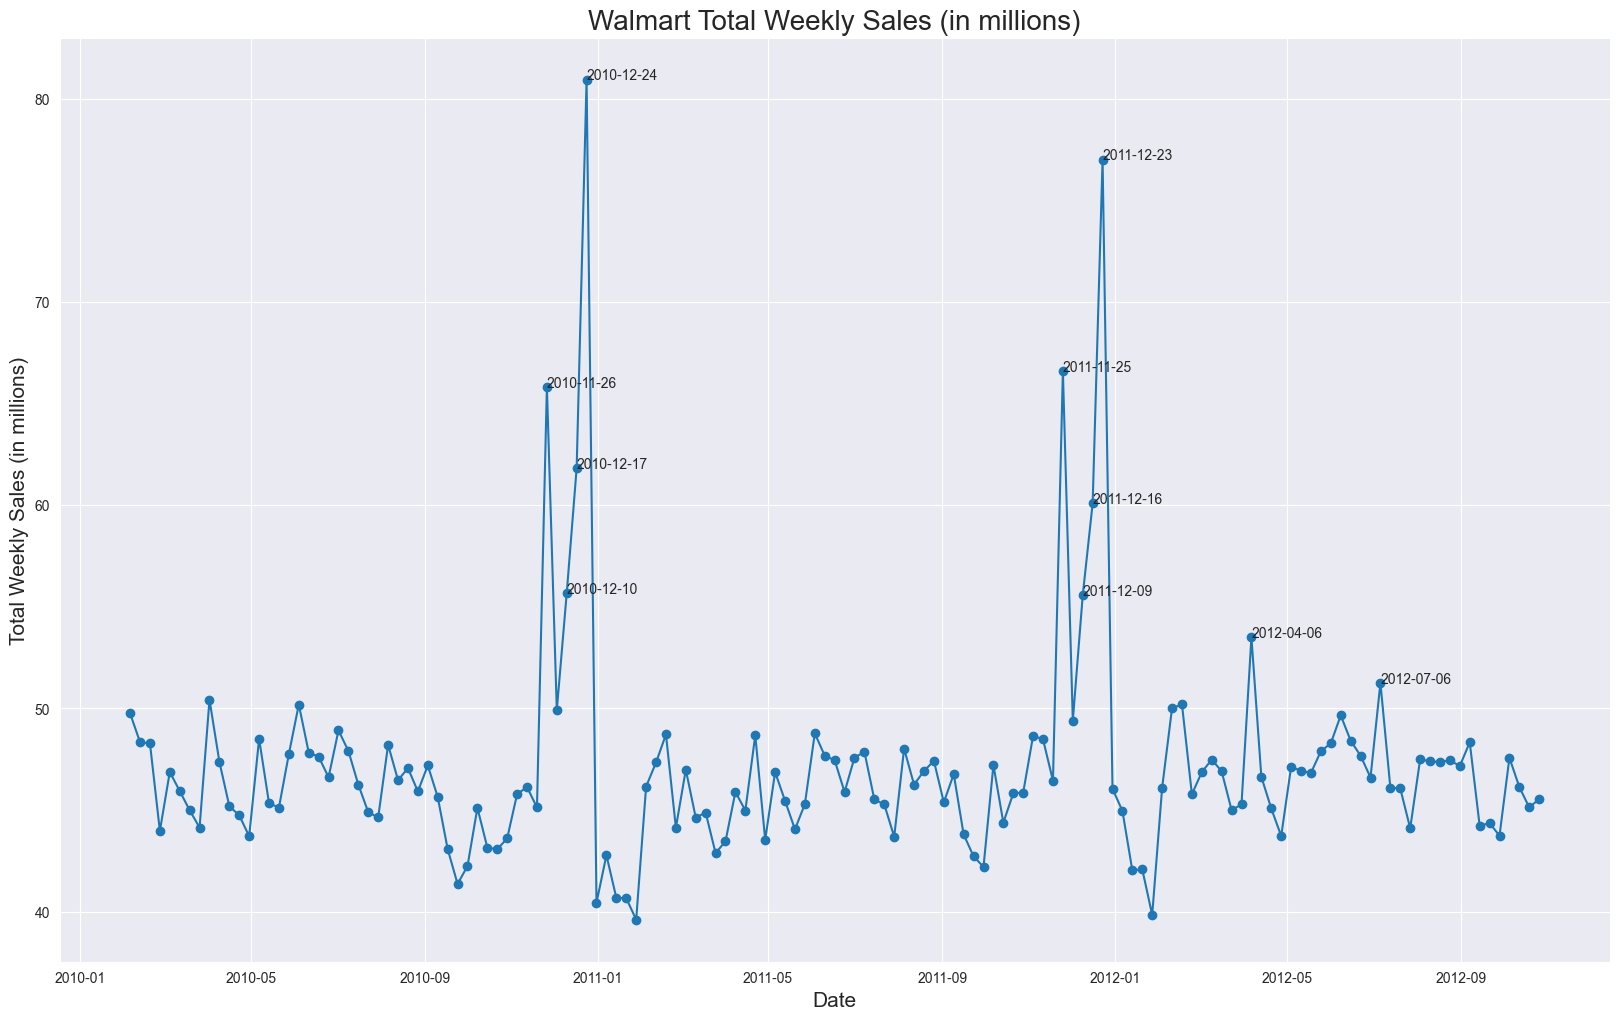

In [99]:
import matplotlib.pyplot as plt

# find the total weekly sales and rest the index to the weekly date
weekly_sales = final_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Convert Weekly_Sales to millions(1000000) else the figure is large an y axis was showing figures with 'e' instead of 10 to power6

weekly_sales['Weekly_Sales'] = weekly_sales['Weekly_Sales'] / 1000000

# create the plot  with Date in x axis and weekly sales data in Y axis
plt.figure(figsize=(20, 12))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], marker='o')

# top ten  Weekly_Sales values
top_n_values = weekly_sales.nlargest(10, 'Weekly_Sales') # top n=10 values

# annotate the top ten values

for _, row in top_n_values.iterrows():
    plt.annotate(f"{row['Date'].date()}", 
                 (row['Date'], row['Weekly_Sales'])) 

plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Weekly Sales (in millions)', fontsize=15)
plt.title('Walmart Total Weekly Sales (in millions)', fontsize=20)
plt.grid(True)
plt.show()

In [100]:
top_n_values

,Date,Weekly_Sales
46,2010-12-24,80.931416
98,2011-12-23,76.998241
94,2011-11-25,66.593605
42,2010-11-26,65.821003
45,2010-12-17,61.820800
97,2011-12-16,60.085696
44,2010-12-10,55.666770
96,2011-12-09,55.561148
113,2012-04-06,53.502316
126,2012-07-06,51.253022


#### So we see that the Top ten sales dates re holiday shopping for Thanksgiving and Christmas. There is a bit of spike in the week near Easter as well as 4th of July week. So it looks like there were deals going on. We can also see a pattern of the sales which tells we can do good forecasting with this data


### Conclusions:

- As we can see the data is totally usable, we had to clean the data as needed 

- We needed to modify data types, do one hot coding as needed. One of the column we kept the data without onehot coding as it will increase the number of columns by more than 120 and that will be difficult to manage. When we want to do model training for specific problem we will do the one hot coding as needed (say we do sales analysis by department or sales analysis by store ID to find better performing store than others)otherwise for normal store sales forecasting if we can prove there is a pattern then we cna build model to forecast.

    In this case as shown above there is a pattern when sales are going up during the holidays 

- In this dataset we did notice class imbalance due to missing data of Markdown, and to circumvent 
 we did notice class imbalance due to lack of markdown data and thus decided to create a seprate data frame which we can use for sales impact analysis due to markdown.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [101]:
top_n_values

,Date,Weekly_Sales
46,2010-12-24,80.931416
98,2011-12-23,76.998241
94,2011-11-25,66.593605
42,2010-11-26,65.821003
45,2010-12-17,61.820800
97,2011-12-16,60.085696
44,2010-12-10,55.666770
96,2011-12-09,55.561148
113,2012-04-06,53.502316
126,2012-07-06,51.253022


 ## Below is plot of a graph to replicate the line chart for non profit support  that was used in the book "Storytelling with Data" introduction section

<Figure size 1000x600 with 0 Axes>

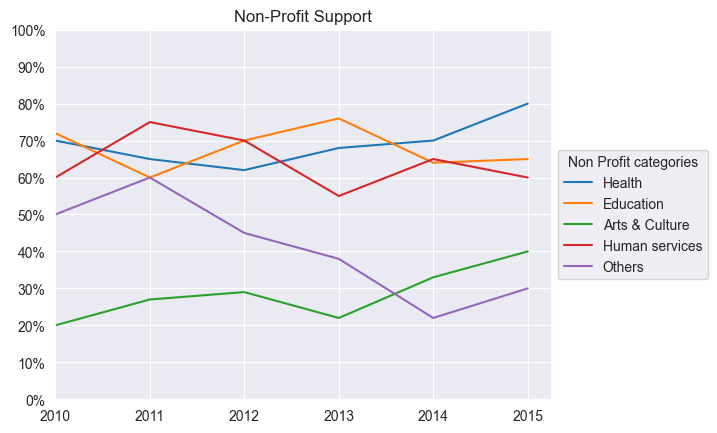

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker


# Data
data_columns = {
    "Health": [70, 65, 62, 68, 70, 80],
    "Education": [72, 60, 70, 76, 64, 65],
    "Arts & Culture": [20, 27, 29, 22, 33, 40],
    "Human services": [60, 75, 70, 55, 65, 60],
    'Others': [50, 60, 45, 38, 22, 30]
}
years = [2010, 2011, 2012, 2013, 2014, 2015]

# lets Create DataFrame
df_non_profit_support = pd.DataFrame(data_columns, index=years)
df_non_profit_support

plt.figure(figsize=(10, 6))
df_non_profit_support.plot(kind='line')
#looked into matplotlib on how to manage the y axis to show percentage
#look into matplotlib percent formatter https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.PercentFormatter
#saw other options which looked more complicated like funcformater  which I will try later
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100)) #Since the data was already in percentage so put xmax=100 this is for scaling

plt.title('Non-Profit Support')
plt.grid(True)
plt.legend(title='Non Profit categories', loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.xlim(left=2010)  # Set x-axis origin to 2010
plt.yticks(ticks=range(0, 101, 10))  # Set y-axis ticks in units of 10%
plt.show()